In [102]:
import sys
from statistics import LinearRegression

import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
from matplotlib import pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv").drop(["ocean_proximity"], axis=1).dropna()
display(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


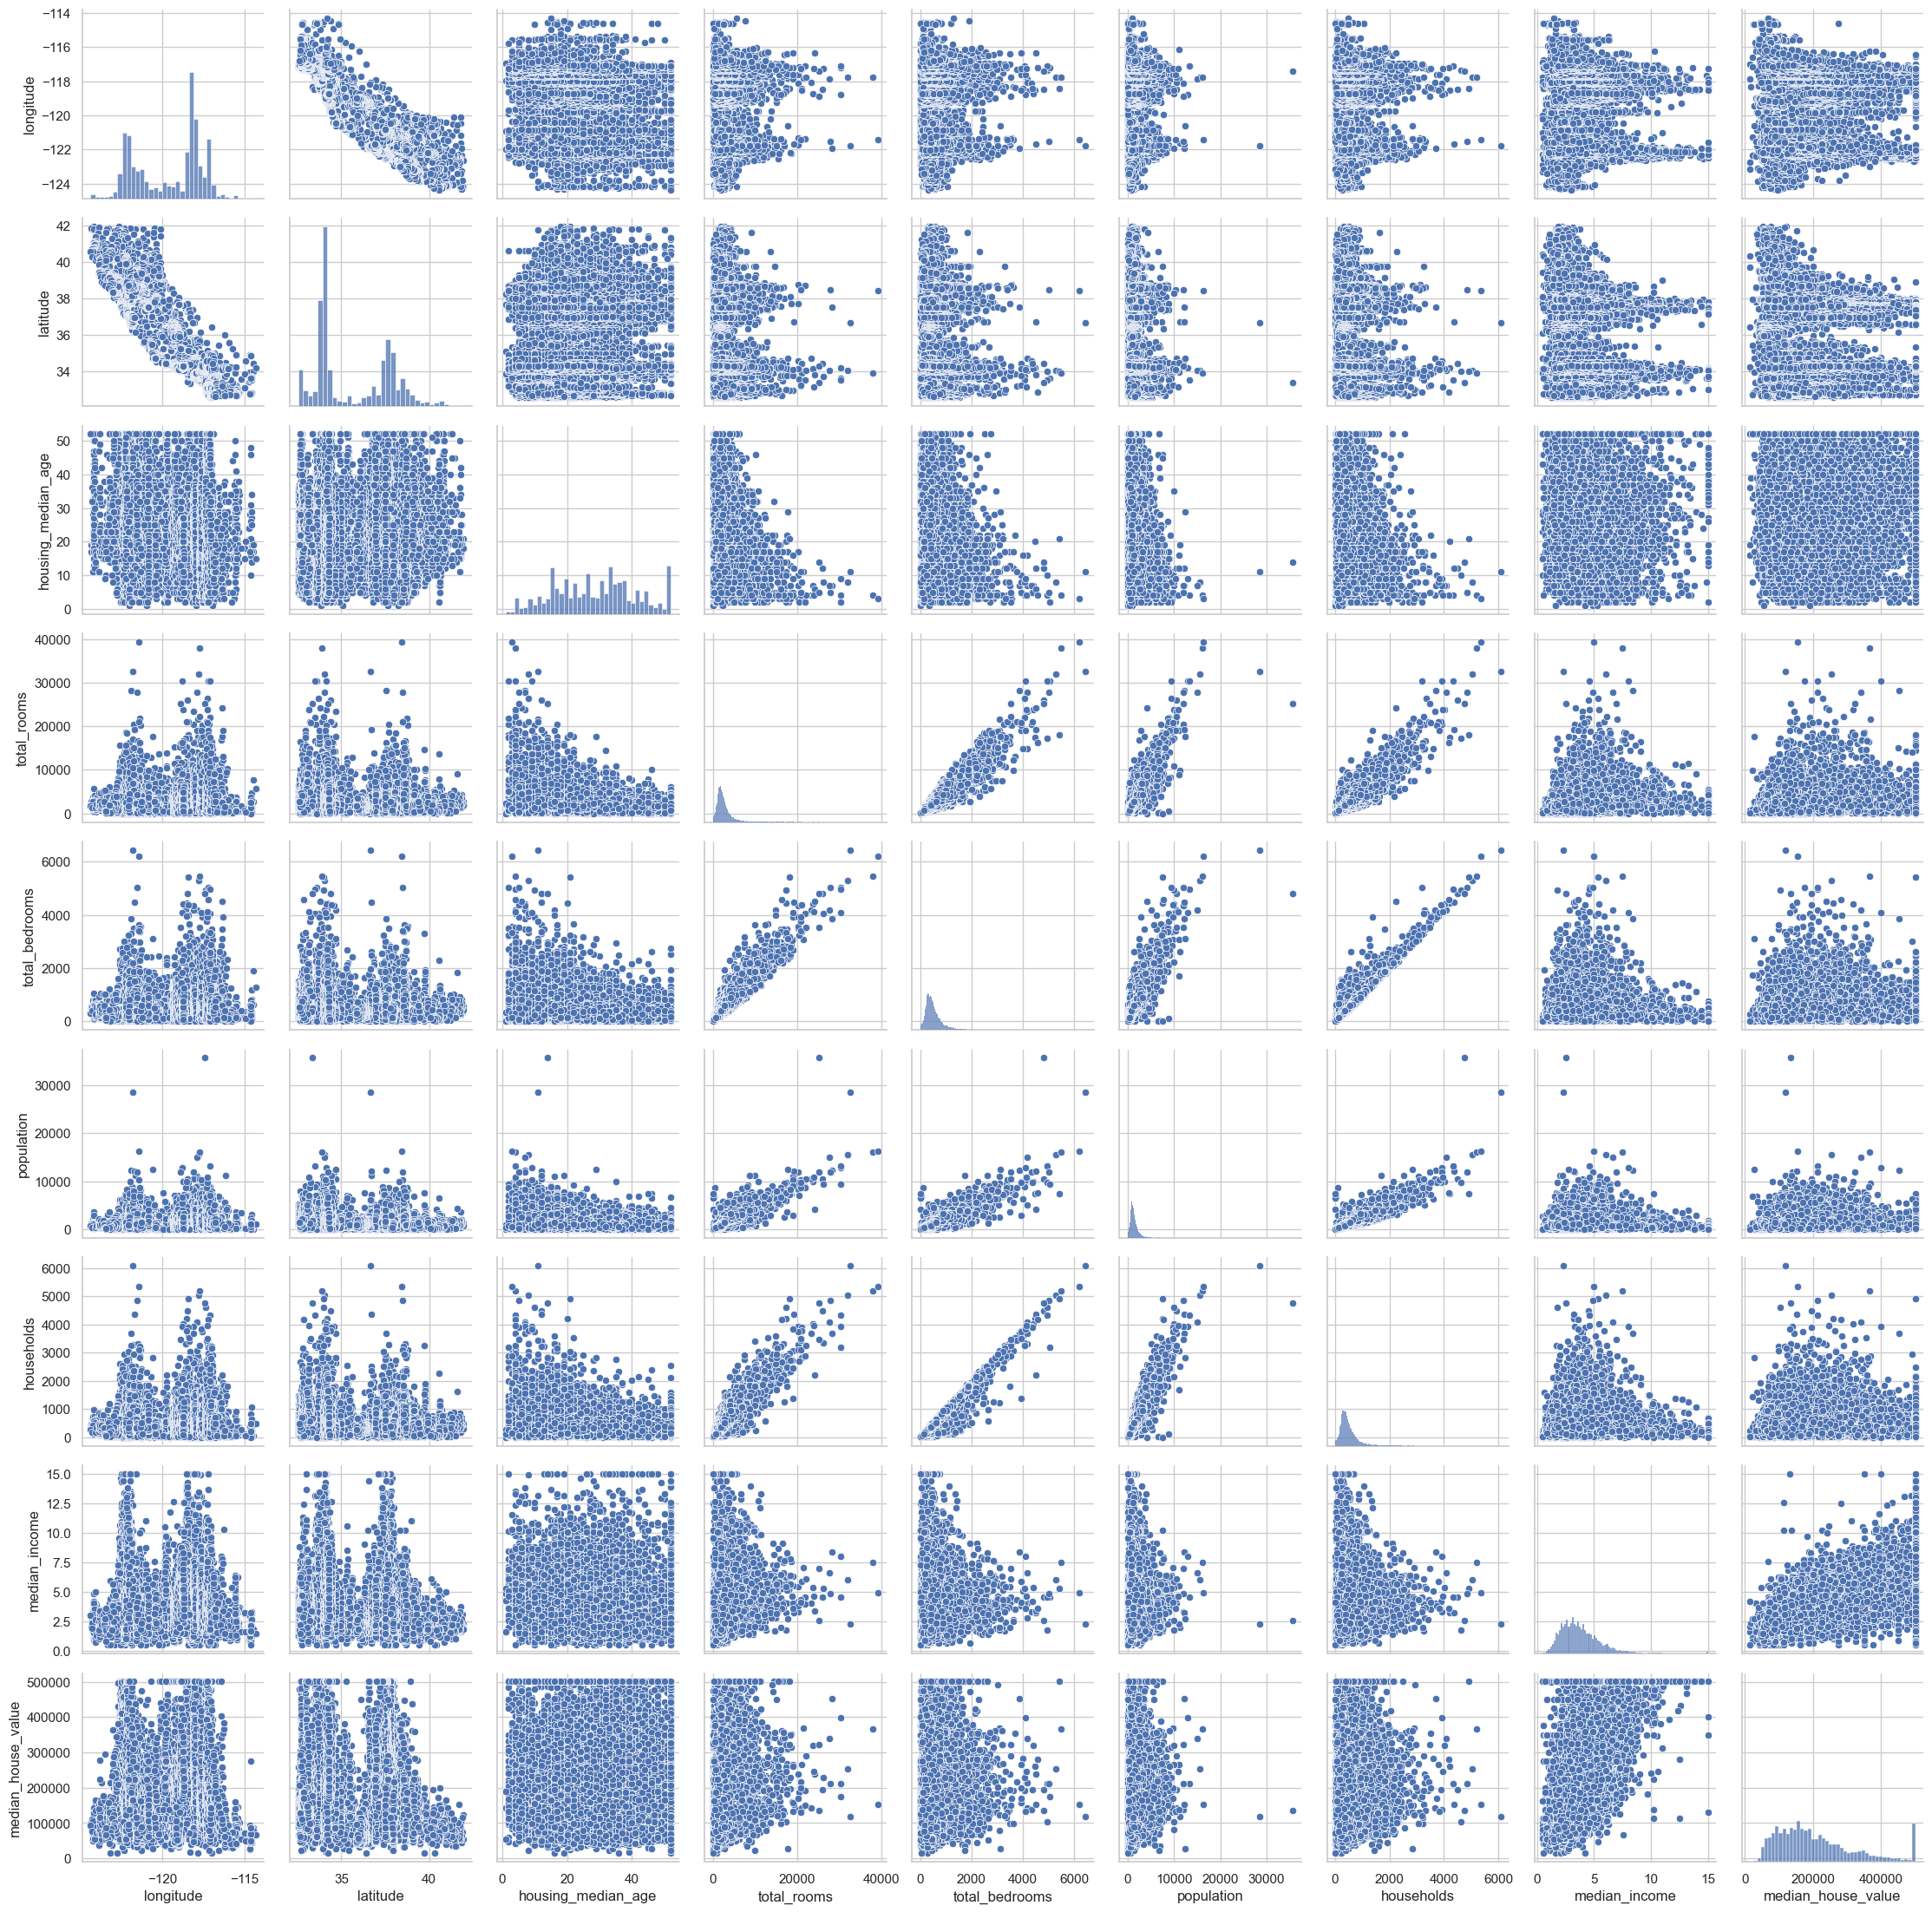

In [103]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
# we can eliminate longitude and latitude as it's histogram has unnatural spikes, and a u shape suggesting a lack of consistency we want to avoid in our model.
# we can eliminate housing_median_age as there is a significant outlier on the right end of the histogram
# total bedrooms, total_rooms, population, households are all features that heavily skew to the left which may impact our model negatively.
# median income is the least skewed feature in its histogram distribution compared to other features. I will use this feature.

Verifying whether our data shape is a dataframe or series...
X_train shape: (15324, 1)
X_test shape: (5109, 1)
y_train shape: (15324,)
y_test shape: (5109,)
X_train is a DataFrame: True
X_test is a DataFrame: True
y_train is a Series: True
y_test is a Series: True 

linear regression intercept and slope:
intercept:  44263.76594256633
slope:  [41970.90311079] 

MSE for training data:  6942697200.897852
R2 for training data:  0.4735510077285794 

MSE for testing data:  7216330967.586251
R2 for testing data:  0.4745894428213311


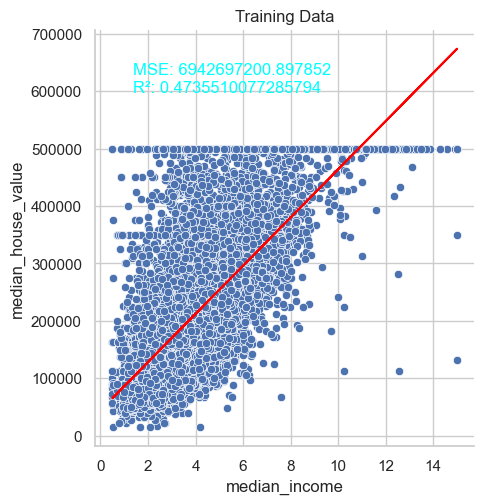

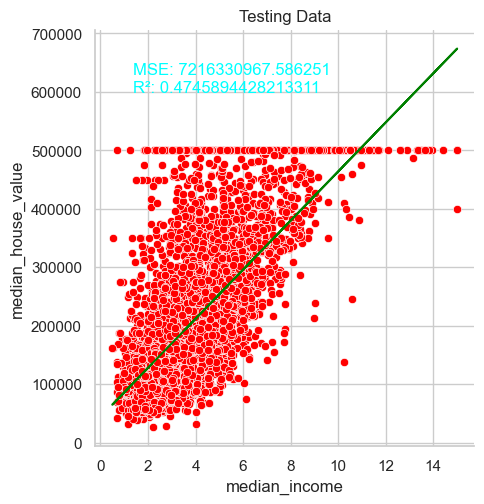

In [123]:
X = df[["median_income"]]
y = df["median_house_value"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25)

print("Verifying whether our data shape is a dataframe or series...")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("X_train is a DataFrame:", isinstance(X_train, pd.DataFrame))
print("X_test is a DataFrame:", isinstance(X_test, pd.DataFrame))
print("y_train is a Series:", isinstance(y_train, pd.Series))
print("y_test is a Series:", isinstance(y_test, pd.Series),"\n")

lr = sklearn.linear_model.LinearRegression().fit(X_train[['median_income']], y_train)
print("linear regression intercept and slope:")
print("intercept: ", lr.intercept_)
print("slope: ", lr.coef_,"\n")

sns.relplot(x=X_train.iloc[:,0], y=y_train, kind='scatter')
p = lr.predict(X_train[['median_income']])
plt.plot(X_train[['median_income']], p, color='red')
plt.title("Training Data")
mseTrain = sklearn.metrics.mean_squared_error(y_train, p)
print("MSE for training data: ", mseTrain)
r2Train = sklearn.metrics.r2_score(y_train, p)
print("R2 for training data: ", r2Train,"\n")
plt.annotate(f"MSE: {mseTrain}\nR²: {r2Train}", 
             xy=(0.1, 0.85), xycoords='axes fraction', 
             fontsize=12, color='cyan')

sns.relplot(x=X_test.iloc[:,0], y=y_test, kind='scatter', color="red")
ptest = lr.predict(X_test[['median_income']])
plt.plot(X_test[['median_income']], ptest, color='green')
plt.title("Testing Data")
mseTest = sklearn.metrics.mean_squared_error(y_test, ptest)
print("MSE for testing data: ", mseTest)
r2Test = sklearn.metrics.r2_score(y_test, ptest)
print("R2 for testing data: ", r2Test)
plt.annotate(f"MSE: {mseTest}\nR²: {r2Test}", 
             xy=(0.1, 0.85), xycoords='axes fraction', 
             fontsize=12, color='cyan')
plt.show()

# Things to note: This model is pretty bad...
# The appearance of a ceiling in our median_house_prices data poses a couple of issues for our model choice. Our linear regression equation will infinitely increase with median income and the ceiling already causes a large deviation from our equation.
# I propose 2 different solutions, either 1.) change the feature or 2.) add more features and change the uni-variate linear regression model to a different model.
# I have a feeling that simply changing the feature will not work, but it's worth testing just to see how strong each feature's relationship is with the target.